# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [76]:
# !pip uninstall tensorflow
# !pip install tensorflow==2.0.0
import warnings
warnings.filterwarnings('ignore')

## Get Required Files from Drive

In [77]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [78]:
#Set your project path 
project_path =  "/content/drive/MyDrive/AIML/AI/Natural Language Processing/Week6 Project/" ## Add your path here ##

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [79]:
import pandas as pd
df = pd.read_json(project_path + "Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [80]:
df.shape

(26709, 3)

In [81]:
# Printing first three headlines to check
print(df.headline[0])
print(df.headline[1])
print(df.headline[2])

former versace store clerk sues over secret 'black code' for minority shoppers
the 'roseanne' revival catches up to our thorny political mood, for better and worse
mom starting to fear son's web series closest thing she will have to grandchild


In [82]:
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [83]:
# Checking the value counts of two classes
total = df.is_sarcastic.count()

non_saracastic_0 = (df.is_sarcastic.value_counts()[0]/total) * 100
saracastic_1 = (df.is_sarcastic.value_counts()[1]/total) * 100


print('Percentage of Non_Sarcastic Headlines in the dataset:{:.2f}%'.format(non_saracastic_0))
print('Percentage of Sarcastic Headlines in the dataset:{:.2f}%'.format(saracastic_1))

Percentage of Non_Sarcastic Headlines in the dataset:56.10%
Percentage of Sarcastic Headlines in the dataset:43.90%


## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [84]:
df1 = df.drop('article_link', axis=1)
df1

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [86]:
df1['sen_length'] = [len(i.split()) for i in df1.headline]
df1

,headline,is_sarcastic,sen_length
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11
...,...,...,...
26704,american politics in moral free-fall,0,5
26705,america's best 20 hikes,0,4
26706,reparations and obama,0,3
26707,israeli ban targeting boycott supporters raise...,0,8


In [87]:
print('min length:',df1.sen_length.min(), '\t' ,'max length:', df1.sen_length.max())

min length: 2 	 max length: 39


In [88]:
import re
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer

# Convert text to lowercase
df1['headline'] = df1['headline'].apply(lambda x: x.lower())

# Strip unwanted spaces
df1['headline'] = df1['headline'].apply(lambda x: x.strip())

# Apply Lemmtization
lemmatizer = WordNetLemmatizer()
df1['headline'] = df1['headline'].apply(lambda x: lemmatizer.lemmatize(x))

# Replace empty strings with Null
df1['headline'].replace('', np.nan, inplace = True)

# Drop Null values
df1 = df1.dropna()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
df1

,headline,is_sarcastic,sen_length
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11
...,...,...,...
26704,american politics in moral free-fall,0,5
26705,america's best 20 hikes,0,4
26706,reparations and obama,0,3
26707,israeli ban targeting boycott supporters raise...,0,8


#**## Modelling**

## Import required modules required for modelling.

In [90]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [91]:
max_features = 10000
maxlen = df1.sen_length.max()        ## Add your max length here ##
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [92]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df1.headline)

# Define X and y for your model.

In [93]:
X = tokenizer.texts_to_sequences(df1['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  307  678 3336 2297   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [94]:
vocab_size = len(tokenizer.word_index)

#**## Word Embedding**

## Get Glove Word Embeddings

In [95]:
glove_file = project_path + "glove.6B.zip"

In [96]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [97]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd


# Create a weight matrix for words in training docs

In [98]:
embedding_matrix = np.zeros((vocab_size+1, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [99]:
embedding_matrix.shape

(29657, 200)

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [100]:
model = Sequential()

### Embedding layer for hint 
model.add(Embedding(vocab_size+1, embedding_size, weights = [embedding_matrix], input_length=maxlen, trainable=False))
### Bidirectional LSTM layer for hint 
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(128,activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


# Adding callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [101]:
batch_size = 100
epochs = 5

## Add your code here ##
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 39, 200)           5931400   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 39, 256)           336896    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)               

In [102]:
history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/5
214/214 [==============================] - 5s 13ms/step - loss: 0.6217 - accuracy: 0.6401 - val_loss: 0.4012 - val_accuracy: 0.8210
Epoch 2/5
214/214 [==============================] - 2s 10ms/step - loss: 0.3842 - accuracy: 0.8335 - val_loss: 0.3496 - val_accuracy: 0.8471
Epoch 3/5
214/214 [==============================] - 2s 10ms/step - loss: 0.2990 - accuracy: 0.8764 - val_loss: 0.3185 - val_accuracy: 0.8635
Epoch 4/5
214/214 [==============================] - 2s 10ms/step - loss: 0.2377 - accuracy: 0.9090 - val_loss: 0.3313 - val_accuracy: 0.8622
Epoch 5/5
214/214 [==============================] - 2s 10ms/step - loss: 0.1776 - accuracy: 0.9320 - val_loss: 0.3340 - val_accuracy: 0.8660


### Splitting the data to check the performance on testset

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [104]:
model = Sequential()

### Embedding layer for hint 
model.add(Embedding(vocab_size+1, embedding_size, weights = [embedding_matrix], input_length=maxlen, trainable=False))
### Bidirectional LSTM layer for hint 
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [105]:
## Add your code here ##
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 39, 200)           5931400   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 39, 256)           336896    
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)               

In [106]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/5
171/171 [==============================] - 5s 14ms/step - loss: 0.6187 - accuracy: 0.6360 - val_loss: 0.4294 - val_accuracy: 0.7990
Epoch 2/5
171/171 [==============================] - 2s 10ms/step - loss: 0.3808 - accuracy: 0.8360 - val_loss: 0.3541 - val_accuracy: 0.8470
Epoch 3/5
171/171 [==============================] - 2s 10ms/step - loss: 0.2988 - accuracy: 0.8778 - val_loss: 0.3485 - val_accuracy: 0.8498
Epoch 4/5
171/171 [==============================] - 2s 10ms/step - loss: 0.2334 - accuracy: 0.9085 - val_loss: 0.3816 - val_accuracy: 0.8489
Epoch 5/5
171/171 [==============================] - 2s 10ms/step - loss: 0.1699 - accuracy: 0.9380 - val_loss: 0.3811 - val_accuracy: 0.8601


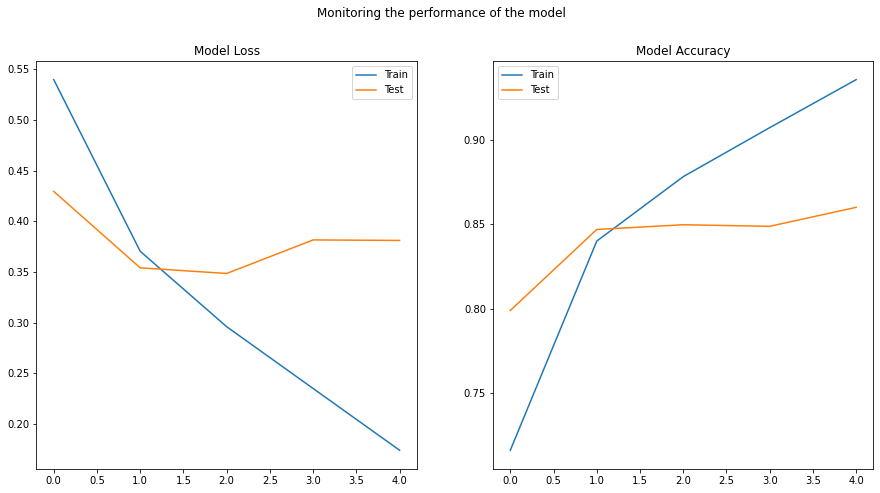

In [107]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.5))
f.suptitle('Monitoring the performance of the model')

ax1.plot(history.history['loss'], label = 'Train')
ax1.plot(history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(history.history['accuracy'], label = 'Train')
ax2.plot(history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

In [108]:
# Validating the model on test set
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
loss, accuracy

(0.381767213344574, 0.851553738117218)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(x_test)>0.5).astype(int)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2967
           1       0.84      0.82      0.83      2375

    accuracy                           0.85      5342
   macro avg       0.85      0.85      0.85      5342
weighted avg       0.85      0.85      0.85      5342



In [110]:
cm = confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(cm, index = ['Non-sarcastic', 'Sarcastic'] , columns = ['Non-sarcastic','Sarcastic'])
cm

,Non-sarcastic,Sarcastic
Non-sarcastic,2590,416
Sarcastic,377,1959


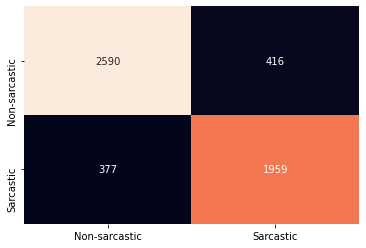

In [111]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt = '', cbar=False)

In [112]:
# Trying to predict own sample statements
statement = ['I am not saying I hate you, what I am saying is that you are literally the Monday of my life.', # Sarcasam
            'My name is Manikanta']                                                                           # Non-Sarcasm


for i in statement:
  statement = i.lower()
  statement = lemmatizer.lemmatize(i)

  headline = tokenizer.texts_to_sequences(statement)
  headline = pad_sequences(headline, maxlen = maxlen)

  sentiment = (model.predict(headline) > 0.5).astype('int32')
  if(np.argmax(sentiment) == 0):
      print('"{}"'.format(statement), 'is a Non-sarcastic statement.')
  elif (np.argmax(sentiment) == 1):
      print('"{}"'.format(statement), 'is a Sarcastic statement.')

"I am not saying I hate you, what I am saying is that you are literally the Monday of my life." is a Sarcastic statement.
"My name is Manikanta" is a Non-sarcastic statement.


**Conclusion**

- We used data pre-processing techniques to clean text, such as:
  - Converting to lower case
  - Remove unwanted spaces
  - Lemmatize
- Some of the observation:
  - 44% of the data have sarcastic labels whereas 56% don't.
  - Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.
  - There are digits in the headlines for e.g. 3 things i needed to hear when i weighed 300 pounds where removing the digits wouldn't help.
- Used Glove embedding layer with Bidirectional LSTM layer.
- Created a separate training and test sets; while fitting the model kept aside a 0.2 for validation;
- Model achieved 86% accuracy on the test set; classification report and confusion matrix were also printed.
- Model was also evaluated on some sample sarcastic statements and did well in identifying given statements to the correct classes